# Univariate Analysis

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Load Dataset

In [76]:
df = pd.read_csv('cars_sampled.csv.zip')

#Displaying the first few rows of the dataset

In [77]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

#Handling Missing Values

In [79]:
df.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [80]:
df.dropna(subset=['vehicleType'],axis=0, inplace=True)
df.dropna(subset=['model'], axis=0, inplace=True)

In [81]:
df.fillna(value={'gearbox': 'automatic'}, inplace=True)
df.fillna(value={'fuelType': 'petrol'}, inplace=True)
df.fillna(value={'notRepairedDamage': 'no'}, inplace=True)

#Remove Duplicates

In [82]:
df.drop_duplicates(inplace=True)

#Normalize

In [83]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: (x - x.mean()) / x.std())

#Final Check

In [84]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 42986 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dateCrawled          42986 non-null  object 
 1   name                 42986 non-null  object 
 2   seller               42986 non-null  object 
 3   offerType            42986 non-null  object 
 4   price                42986 non-null  float64
 5   abtest               42986 non-null  object 
 6   vehicleType          42986 non-null  object 
 7   yearOfRegistration   42986 non-null  float64
 8   gearbox              42986 non-null  object 
 9   powerPS              42986 non-null  float64
 10  model                42986 non-null  object 
 11  kilometer            42986 non-null  float64
 12  monthOfRegistration  42986 non-null  float64
 13  fuelType             42986 non-null  object 
 14  brand                42986 non-null  object 
 15  notRepairedDamage    42986 non-null  obje

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,4.298600e+04,4.298600e+04,4.298600e+04,4.298600e+04,4.298600e+04,4.298600e+04
mean,6.611853e-19,-1.326404e-14,1.322371e-17,1.401713e-16,1.087650e-16,9.471479e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.677791e-02,-1.133049e+01,-5.421197e-01,-3.061979e+00,-1.678033e+00,-1.951940e+00
25%,-6.936392e-02,-5.716586e-01,-2.090754e-01,-6.513016e-01,-8.408085e-01,-7.846278e-01
50%,-4.421040e-02,3.447260e-02,-5.365474e-02,6.174762e-01,-3.583710e-03,-4.348635e-02
75%,1.383621e-02,6.406038e-01,1.239689e-01,6.174762e-01,8.336411e-01,8.140629e-01
max,1.591632e+02,2.307465e+00,8.521457e+01,6.174762e-01,1.670866e+00,1.892285e+00


# Numerical Variable Analysis

#Plotting Histogram for Price

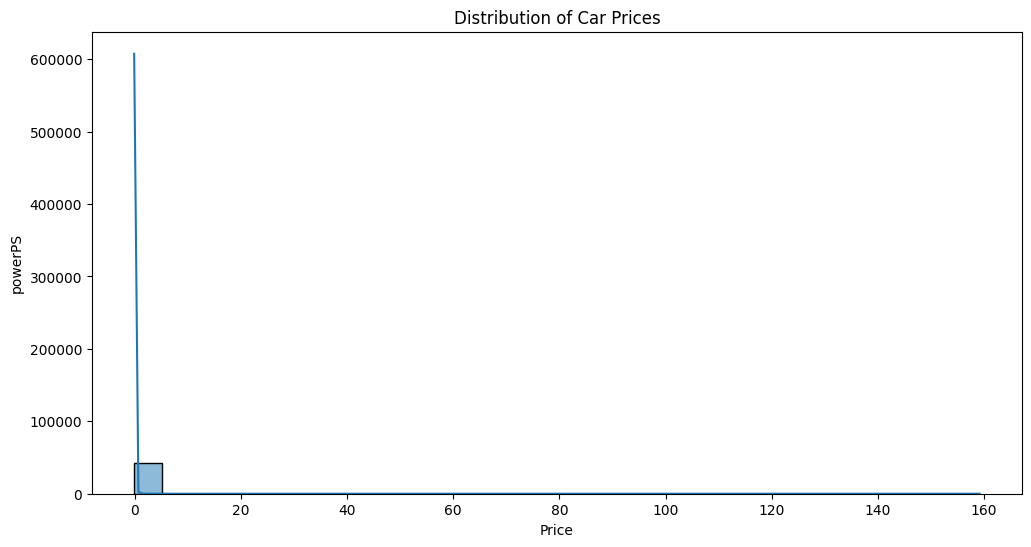

In [85]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('powerPS')
plt.show()

#Box Plot for Kilometer

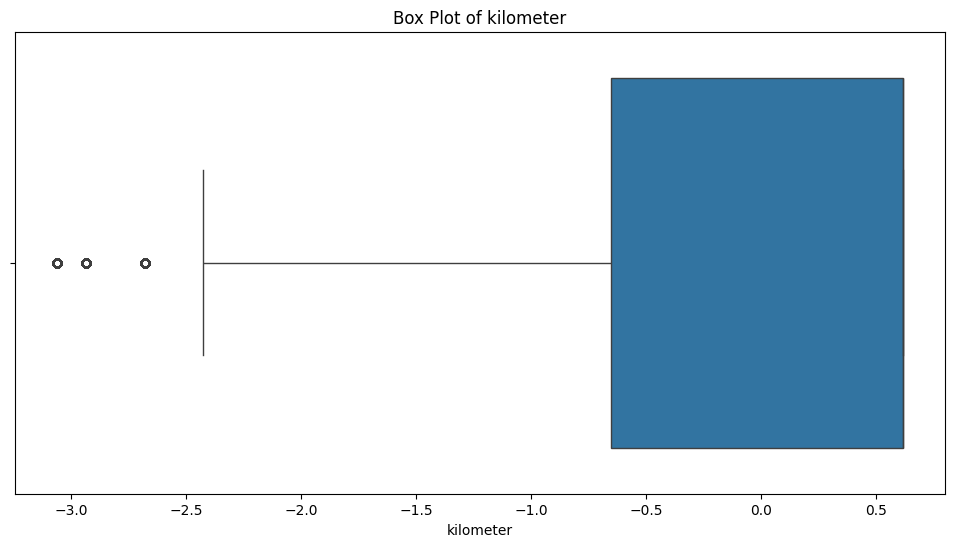

In [86]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['kilometer'])
plt.title('Box Plot of kilometer')
plt.xlabel('kilometer')
plt.show()

#Categorial Variable Analysis: Fuel Type

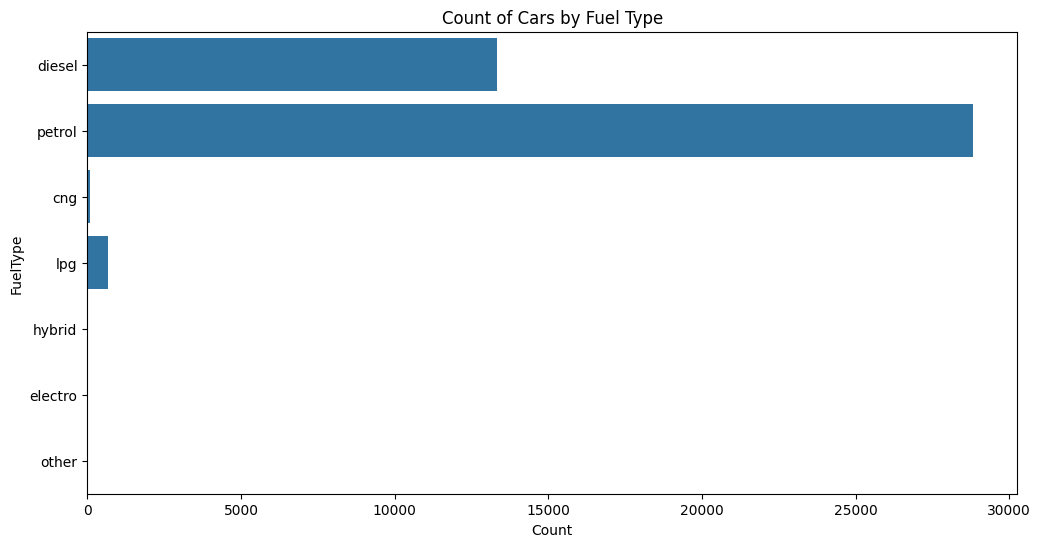

In [87]:
plt.figure(figsize=(12, 6))
sns.countplot(y='fuelType', data=df)
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Count')
plt.ylabel('FuelType')
plt.show()

# Multivariate Analysis

#Correlation Matrix

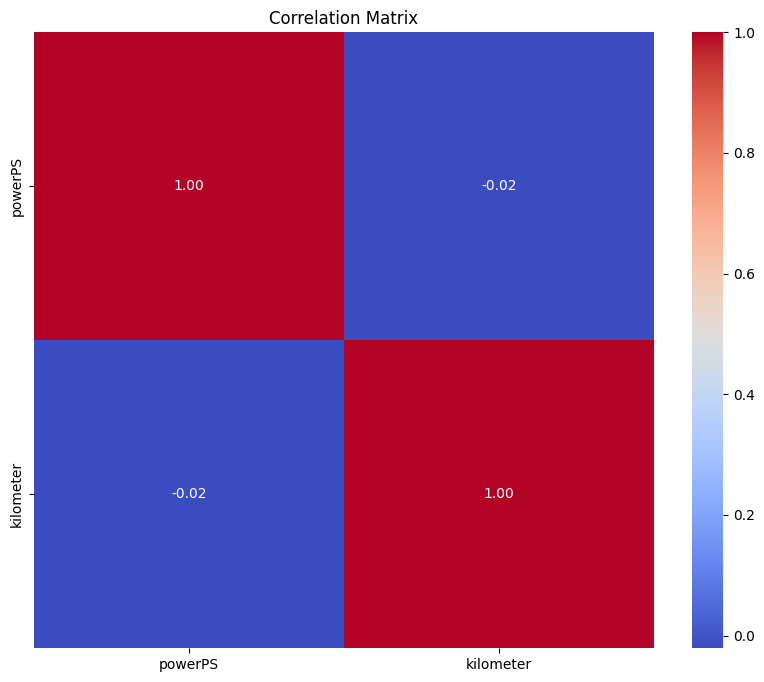

In [88]:
correlation_matrix = df[["powerPS","kilometer"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#groupped Bar Chart for Average Price by Fuel Type

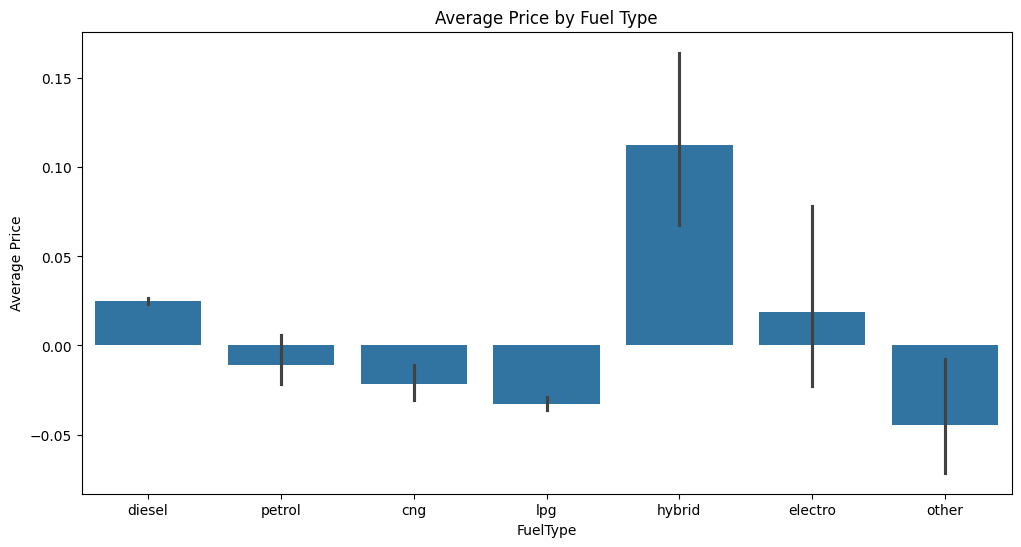

In [89]:
plt.figure(figsize=(12, 6))
sns.barplot(x='fuelType', y='price', data=df, estimator='mean')
plt.title('Average Price by Fuel Type')
plt.xlabel('FuelType')
plt.ylabel('Average Price')
plt.show()

#Scatter Plot for Price vs monthOfRegistartion

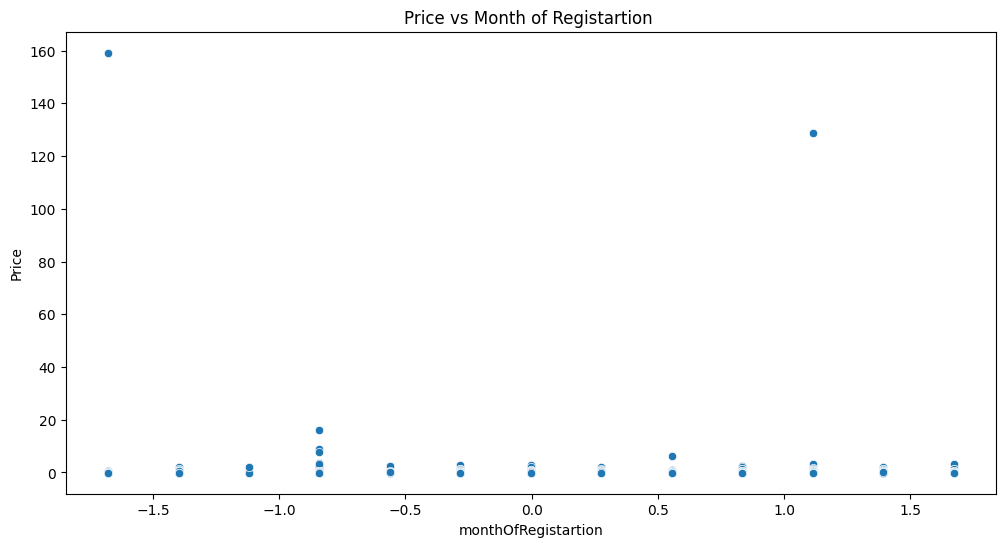

In [91]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='monthOfRegistration', y='price', data=df)
plt.title('Price vs Month of Registartion ')
plt.xlabel('monthOfRegistartion')
plt.ylabel('Price')
plt.show()